# Representations of "Traid groups" (hardcore 3-interaction orbifold groups)

The 3 stranded Traid group:
$$ \mathcal{T}_3 = \left< t_1, t_2 \mid t_1^2 = t_2^2 = 1\right>$$
The symmetric group on 3 letters:
$$ S_3 = \left< t_1, t_2 \mid t_1^2 = t_2^2 = (t_2 t_1)^3= 1\right>$$
Note that $S_3$ has exactly one more relation and it corresponds exactly to the triple point.

We want to look for a representation of $\mathcal{T}_3$ into $U(8)$. Here I'm thinking that each of the 3 particles comes with a spin which can be either up or down. That attaches a $\mathbb{C}^2$ tensor factor to each of the strands/particles. Hence we are acting on $\mathbb{C}^2\otimes \mathbb{C}^2 \otimes \mathbb{C}^2 \cong \mathbb{C}^8$.

We'll want this to generalize to a higher stranded groups, so I'm thinking that the $t_i$ should correspond to matrices which are "local" in the sense that they only act non-trivially on the $i^{th}$ and $(i+1)^{st}$ $\mathbb{C}^2$ tensor factors. This has the advantage that it will give us the $t_i,t_j$, $|i-j|>1$ commutation relation for free in the higher stranded groups $\mathcal{T}_n$.

I'll also make the assumption that, when restricted to "their" summands, $t_i, t_j$ should act in the _same way_. That seems realistic when we are considering particles of the same type. That means that
$$ \rho(t_1) = M \otimes I_2$$
and $$\rho(t_2) = I_2 \otimes M$$ for some $M \in U(\mathbb{C}^2\otimes\mathbb{C}^2)$. For $n$-particles:
$$ \rho(t_i) = \underbrace{I_2 \otimes \cdots \otimes I_2}_{i-1} \otimes M \otimes \underbrace{I_2 \otimes \cdots \otimes I_2}_{n-i-1}.$$


## What kind of matrices are these: Hermitian Unitary matrices

Any unitary matrix rep. $M$ will have $M M^\dagger=1$. As $t_i^2=1$ for all $i$, we must also have $M^2=1$ so $M=M^\dagger$ by uniqueness of inverses. i.e. $M$ is both unitary and Hermitian.

Two facts:
1. Unitary matrices have a complete set of eigenvectors and eigenvalues which lie in $U(1)$.
2. Hermitian matrices have complete set of eigenvectors and eigenvalues which are real.
So any such matrix has eigenvalues equal to $\pm 1$.

Thus $M$ is of the form $$M = P S P^{-1}$$ where $S$ is a diagonal matrix with non-zero entries equal to $\pm1$ and we can assume $P \in SU(4)$.

If $S=\pm I$ then so is $M$, so we should exclude the cases that there are one or four negative eigenvalues as they are boring. 

## A first try for $M$

There are some obvious choices for $P$'s and $S$'s which give the trivial and symmetric group representations. We could have $M$ be simply the matrix which swaps tensor factors. For reference, that one is
$$ \left(\begin{matrix}
1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1
\end{matrix}\right). $$
That is, if $e_1,e_2$ and $f_1,f_2$ are bases for the $\mathbb{C}^2$s, then interchanging the $\mathbb{C}^2$ factors leaves $e_1\otimes f_1$ and $e_2\otimes f_2$ alone and swaps $e_1\otimes f_2$ and $e_2\otimes f_1$.

This corresponds to $P$ equal to
$$ \left(\begin{matrix}
 0 & 1 & 0 & 0 \\
 1 & 0 & 1 & 0 \\
-1 & 0 & 1 & 0 \\
 0 & 0 & 0 & 1
\end{matrix}\right)$$ and $S$ equal to
$$ \left(\begin{matrix}
-1 & 0 & 0 & 0 \\
 0 & 1 & 0 & 0 \\
 0 & 0 & 1 & 0 \\
 0 & 0 & 0 & 1
\end{matrix}\right).$$

#### Such an $M$ gives a trivial representation to $\gamma=(t_2 t_1)^3$.

In [1]:
import itertools

In [2]:
M = matrix([[1,0,0,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]])

t1 = M.tensor_product(identity_matrix(2))
t2 = identity_matrix(2).tensor_product(M)

In [3]:
# verify that this is really a rep.
assert t1.conjugate_transpose() == t1
assert t2.conjugate_transpose() == t2
assert t1^2 == identity_matrix(8)
assert t2^2 == identity_matrix(8)
print "passed check - this is a representation"


passed check - this is a representation


In [4]:
gamma = (t2*t1)^3

if gamma == identity_matrix(8):
    print "trivial rep on gamma"
else:
    print "non-trivial rep!"    

trivial rep on gamma


## So... what if the center get's one of the other Pauli matrices?

In [5]:
M = identity_matrix(1).block_sum(matrix([[0,i],[-i,0]])).block_sum(identity_matrix(1))

t1 = M.tensor_product(identity_matrix(2))
t2 = identity_matrix(2).tensor_product(M)

In [6]:
# verify that this is really a rep.
assert t1.conjugate_transpose() == t1
assert t2.conjugate_transpose() == t2
assert t1^2 == identity_matrix(8)
assert t2^2 == identity_matrix(8)
print "passed check - this is a representation"

passed check - this is a representation


In [7]:
gamma = (t2*t1)^3

if gamma == identity_matrix(8):
    print "trivial rep on gamma"
else:
    print "non-trivial rep!"

trivial rep on gamma


### Nope, not that one. Try the other one

In [8]:
M = identity_matrix(1).block_sum(matrix([[1,0],[0,-1]])).block_sum(identity_matrix(1))

t1 = M.tensor_product(identity_matrix(2))
t2 = identity_matrix(2).tensor_product(M)

In [9]:
# verify that this is really a rep.
assert t1.conjugate_transpose() == t1
assert t2.conjugate_transpose() == t2
assert t1^2 == identity_matrix(8)
assert t2^2 == identity_matrix(8)
print "passed check - this is a representation"

passed check - this is a representation


In [12]:
gamma = (t2*t1)^3

if gamma == identity_matrix(8):
    print "trivial rep on gamma"
else:
    print "non-trivial rep!"

non-trivial rep!


Ok, the rep was non-trivial, but it is not all that interesting as we see below:

In [13]:
gamma

[ 1  0  0  0  0  0  0  0]
[ 0  1  0  0  0  0  0  0]
[ 0  0 -1  0  0  0  0  0]
[ 0  0  0  1  0  0  0  0]
[ 0  0  0  0 -1  0  0  0]
[ 0  0  0  0  0 -1  0  0]
[ 0  0  0  0  0  0 -1  0]
[ 0  0  0  0  0  0  0  1]

# Generalizing and restricting

Let's pare down the dimension of the vector space we are working on. Before, we were looking at $(\mathbb{C}^2)^{\otimes n}$. That corresponds to all combinations of spin-up and spin-down for each particle. Let's assume that the number of spin-up and spin-down particles is conserved. Then the big tensor product splits into a bunch of summands whose dimensions are given by the binomial theorem. 

In particular, let's restrict ourselves to the "exactly one spin-up" summand. That's a summand of $(\mathbb{C}^2)^{\otimes n}$ of $\mathbb{C}$-dimension equal to $n$. The two particle case then becomes greatly restricted. Recall that $t_i^2=1$ plus unitarity implied that the matrix representative $M$ had eigenvalues $\pm1$. Then the only _interesting_ possibility is that $M$ has both $+1$ and $-1$ as eigenvalues exactly once. That's a reflection! This means that we can specify $M$ completely by a choice of a unit vector in $\mathbb{C}^2$, modulo phase.

That is, $M$ is the matrix realization of $v \to v-\langle v, u \rangle u$, for $u$ a unit vector. If we vary $u$ by $e^{i\theta}$, then the map becomes $ v \to v -\langle v, e^{i\theta} u \rangle e^{i\theta} u$ which is just the same as the original map as the inner-product is complex anti-linear in the second variable.

If $$u= \left[ \begin{matrix} a \\ b \end{matrix} \right]$$, then $M$ has the form as $$M= \left[ \begin{matrix} 1-2\overline{a}a & -2\overline{b}a \\ -2\overline{a}b & 1-2\overline{b}b \end{matrix} \right].$$ Now, we know that the unit vectors in $\mathbb{C}^2$ can be parameterized by $$u= \left[ \begin{matrix} e^{i \xi_1} sin(\eta) \\ e^{i \xi_2} \cos(\eta) \end{matrix} \right]$$ so the formula for $M$ simplifies a bit with $\xi=\xi_2-\xi_1$.

In [43]:
var('xi,xi_1,xi_2,eta')
assume(xi,'real')
assume(xi_1,'real')
assume(xi_2,'real')
assume(eta,'real')

In [44]:
M = matrix([[1-2*sin(eta)^2,-2*exp(-i*xi)*sin(eta)*cos(eta)],
            [-2*exp(i*xi)*sin(eta)*cos(eta),1-2*cos(eta)^2]])

# unitary
assert M*M.conjugate_transpose() == identity_matrix(2)

pretty_print(M)
print(det(M).simplify_full())

[             -2*sin(eta)^2 + 1 -2*cos(eta)*e^(-I*xi)*sin(eta)]
[ -2*cos(eta)*e^(I*xi)*sin(eta)              -2*cos(eta)^2 + 1]

-1


In [45]:
t1 = M.block_sum(identity_matrix(1))
t2 = identity_matrix(1).block_sum(M)

pretty_print(t1)
pretty_print(t2)

[             -2*sin(eta)^2 + 1 -2*cos(eta)*e^(-I*xi)*sin(eta)                              0]
[ -2*cos(eta)*e^(I*xi)*sin(eta)              -2*cos(eta)^2 + 1                              0]
[                             0                              0                              1]

[                             1                              0                              0]
[                             0              -2*sin(eta)^2 + 1 -2*cos(eta)*e^(-I*xi)*sin(eta)]
[                             0  -2*cos(eta)*e^(I*xi)*sin(eta)              -2*cos(eta)^2 + 1]

In [46]:
# verify that this is really a rep.
assert t1.conjugate_transpose() == t1
assert t2.conjugate_transpose() == t2
assert t1*t1.conjugate_transpose() == identity_matrix(3)
assert t2*t2.conjugate_transpose() == identity_matrix(3)
assert t1^2 == identity_matrix(3)
assert t2^2 == identity_matrix(3)
print "passed check - this is a representation of T_3"

passed check - this is a representation of T_3


Now that we have a representation on $\mathbb{C}^3$, let's get one on $\mathbb{C}^2$: The matrices $t_1, t_2$ only operate non-trivially on the complex span of $$u_1= \left[ \begin{matrix} sin(\eta) \\ e^{i \xi} \cos(\eta) \\ 0 \end{matrix} \right], u_2= \left[ \begin{matrix} 0 \\ sin(\eta) \\ e^{i \xi} \cos(\eta) \end{matrix} \right]$$ There must be a 1-dimensional trivial representation in our $\mathbb{C}^3$! Let's factor it out.

In [48]:
# Find vector spanning trivial summand 
Q = matrix([[sin(eta), exp(i*xi)*cos(eta),                  0],
            [       0,           sin(eta), exp(i*xi)*cos(eta)]])

e3 = Q.right_kernel().basis()[0].conjugate()
#e3 = e3/e3.norm()

pretty_print(e3)

(1, -e^(I*xi)*sin(eta)/cos(eta), e^(2*I*xi)*sin(eta)^2/cos(eta)^2)

In [49]:
# didn't get a unit vector. That's fine
pretty_print( (e3*e3.conjugate()).simplify_full() )

(cos(eta)^4 - cos(eta)^2 + 1)/cos(eta)^4

In [52]:
# one vector of the oher summand, we know for certain. 
e1 = vector([sin(eta), exp(i*xi)*cos(eta), 0])

# Find another, _orthogonal_ to the first. (We had another which spanned, but not orthogonal.)
Q2 = matrix([e1,e3])
e2 = ( Q2.right_kernel().basis()[0].conjugate() ).simplify_full()

# not a unit vector. That's fine for now.
pretty_print( (e2*e2.conjugate()).expand().simplify_full() )

(cos(eta)^4 - cos(eta)^2 + 1)/(cos(eta)^2*sin(eta)^4)

In [54]:
# should be an orthogonal set
assert (e1*e2.conjugate()).simplify_full() == 0
assert (e1*e3.conjugate()).simplify_full() == 0
assert (e2*e3.conjugate()).simplify_full() == 0

print "passed orthogonality check, norms:"

print( (e1*e1.conjugate()).simplify_full() )
print( (e2*e2.conjugate()).simplify_full() )
print( (e3*e3.conjugate()).simplify_full() )

passed orthogonality check, norms:
1
(cos(eta)^4 - cos(eta)^2 + 1)/(cos(eta)^2*sin(eta)^4)
(cos(eta)^4 - cos(eta)^2 + 1)/cos(eta)^4


In [55]:
# normalize e2
e2 = e2/e2.norm()

In [73]:
# Change of basis matrix
Q = matrix([e1,e2,e3/e3.norm()]).transpose()

# a bit of a mess, mostly resolves later
pretty_print(Q)

[                                                                                                                sin(eta)                                             1/sqrt(abs(e^(I*xi)*sin(eta)/cos(eta))^2 + abs(e^(2*I*xi)/sin(eta)^2)^2 + 1)                                  1/sqrt(abs(e^(I*xi)*sin(eta)/cos(eta))^2 + abs(e^(2*I*xi)*sin(eta)^2/cos(eta)^2)^2 + 1)]
[                                                                                                       cos(eta)*e^(I*xi)                 -e^(I*xi)*sin(eta)/(sqrt(abs(e^(I*xi)*sin(eta)/cos(eta))^2 + abs(e^(2*I*xi)/sin(eta)^2)^2 + 1)*cos(eta))      -e^(I*xi)*sin(eta)/(sqrt(abs(e^(I*xi)*sin(eta)/cos(eta))^2 + abs(e^(2*I*xi)*sin(eta)^2/cos(eta)^2)^2 + 1)*cos(eta))]
[                                                                                                                       0                      -e^(2*I*xi)/(sqrt(abs(e^(I*xi)*sin(eta)/cos(eta))^2 + abs(e^(2*I*xi)/sin(eta)^2)^2 + 1)*sin(eta)^2) e^(2*I*xi)*sin(eta)^2/(sqrt(abs(e^(I*xi)*sin(eta)/cos(eta))^2 + abs(e^(2*I*xi)*sin(eta)^2/cos(eta)^2)^2 + 1)*cos(eta)^2)]

The change of basis matrix $Q$, below, is in $U(3)$.

passed unitarity check
det(Q)=


-(cos(eta)^4 - cos(eta)^2 + 1)*abs(cos(eta))*e^(3*I*xi)/(sqrt(cos(eta)^2*sin(eta)^4 + sin(eta)^6 + cos(eta)^2)*sqrt(cos(eta)^4 + cos(eta)^2*sin(eta)^2 + sin(eta)^4)*cos(eta))

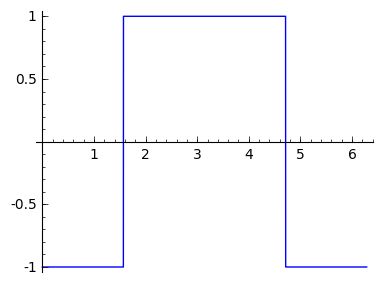

In [79]:
assert (Q*Q.conjugate_transpose()).simplify_full() == identity_matrix(3)

print("passed unitarity check")

print("det(Q)=")
pretty_print( det(Q).simplify_full() )

plot( det(Q).simplify_full()(xi=0,eta=x), (x,0,2*pi), figsize=4)

Rewrite the $t_i$ generators in the new basis and extract the non-trivial rep.

In [81]:
t1_new_basis = (Q.conjugate_transpose() * t1 * Q).simplify_full()

pretty_print( t1_new_basis )

t1_red = t1_new_basis.submatrix(0,0,2,2)

pretty_print( t1_red )

# det is obviously -1

[-1  0  0]
[ 0  1  0]
[ 0  0  1]

[-1  0]
[ 0  1]

In [83]:
t2_new_basis = (Q.conjugate_transpose() * t2 * Q).simplify_full()

pretty_print( t2_new_basis )

t2_red = t2_new_basis.submatrix(0,0,2,2)

pretty_print( t2_red )

assert det(t2_red).simplify_full() == -1
print("passed det=-1 check")

[                                                                         2*cos(eta)^4 - 2*cos(eta)^2 + 1 2*(sin(eta)^5 + cos(eta)^2*sin(eta))*abs(cos(eta))/sqrt(cos(eta)^2*sin(eta)^4 + sin(eta)^6 + cos(eta)^2)                                                                                                        0]
[2*(sin(eta)^5 + cos(eta)^2*sin(eta))*abs(cos(eta))/sqrt(cos(eta)^2*sin(eta)^4 + sin(eta)^6 + cos(eta)^2)                                                                         -2*cos(eta)^4 + 2*cos(eta)^2 - 1                                                                                                        0]
[                                                                                                       0                                                                                                        0                                                                                                        1]

[                                                                         2*cos(eta)^4 - 2*cos(eta)^2 + 1 2*(sin(eta)^5 + cos(eta)^2*sin(eta))*abs(cos(eta))/sqrt(cos(eta)^2*sin(eta)^4 + sin(eta)^6 + cos(eta)^2)]
[2*(sin(eta)^5 + cos(eta)^2*sin(eta))*abs(cos(eta))/sqrt(cos(eta)^2*sin(eta)^4 + sin(eta)^6 + cos(eta)^2)                                                                         -2*cos(eta)^4 + 2*cos(eta)^2 - 1]

passed det=-1 check


In [85]:
# verify that this is really a rep.
assert t1_red.conjugate_transpose() == t1_red
assert t2_red.conjugate_transpose() == t2_red
assert t1_red*t1_red.conjugate_transpose() == identity_matrix(2)
assert t2_red*t2_red.conjugate_transpose() == identity_matrix(2)
assert t1_red^2 == identity_matrix(2)
assert t2_red^2 == identity_matrix(2)
print "passed check - this is a representation of T_3"

passed check - this is a representation of T_3


**Interesting:** Reduced $t_2$ is real. 

In [101]:
assert t2_red[0,1] == t2_red[1,0]
assert t2_red[0,0] == -t2_red[1,1]
print("y")

y


1


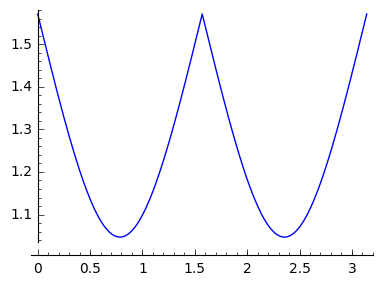

In [169]:
a = t2_red[0,0]
b = t2_red[0,1]

# on the unit circle
print ( a^2+b^2 ).simplify_full()

plot( arctan(b/(1-a)), (eta,0,pi), color='blue', figsize=4)


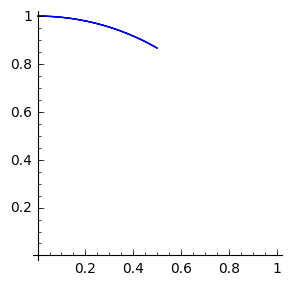

In [182]:
theta = arctan(b/(1-a))

P = parametric_plot( (cos(theta), sin(theta)), (eta,0,pi/2))
P.show(aspect_ratio=1, figsize=4, ymin=0, xmax=1)

In [156]:
pretty_print(  diff(arctan(b/(1-a)).simplify_full(), eta).simplify_full() )

-(2*cos(eta)^3 - cos(eta))/(sqrt(cos(eta)^4 - cos(eta)^2 + 1)*abs(cos(eta)))

In [176]:
solve( diff(arctan(b/(1-a)).simplify_full(), eta).simplify_full() == 0, eta)

[eta == 3/4*pi, eta == 1/4*pi, eta == 1/2*pi]

In [177]:
pretty_print( t2_red(eta=pi/4) )

pretty_print( (t2_red(eta=pi/4)*t1_red)^3 )

[        1/2 1/2*sqrt(3)]
[1/2*sqrt(3)        -1/2]

[1 0]
[0 1]

In [179]:
pretty_print( t2_red(eta=pi/2) )

pretty_print( (t2_red(eta=pi/2)*t1_red)^3 )

[ 1  0]
[ 0 -1]

[-1  0]
[ 0 -1]

In [186]:
# minimum angle above horizontal for -1 eigen-space
theta(eta=pi/4).simplify_full()

1/3*pi

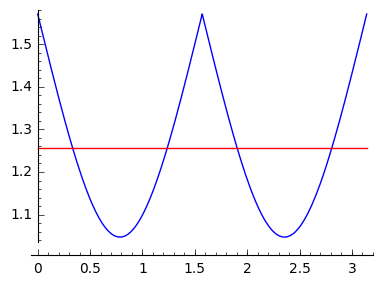

In [212]:
P  = plot(theta,(eta,0,pi),figsize=4)
P += plot((pi/2)-pi/10,(eta,0,pi), color='red')

P.show()

In [213]:
pretty_print( solve( theta.simplify_full() == pi/2-pi/10, eta) )

[abs(cos(eta)) == -(sqrt(2*sqrt(5) + 5)*sin(eta)^3 - sqrt(2*sqrt(5) + 5)*sin(eta))/sqrt(sin(eta)^4 - sin(eta)^2 + 1)]

In [214]:
solve( theta.simplify_full() == pi/2-pi/10, eta)

[abs(cos(eta)) == -(sqrt(2*sqrt(5) + 5)*sin(eta)^3 - sqrt(2*sqrt(5) + 5)*sin(eta))/sqrt(sin(eta)^4 - sin(eta)^2 + 1)]

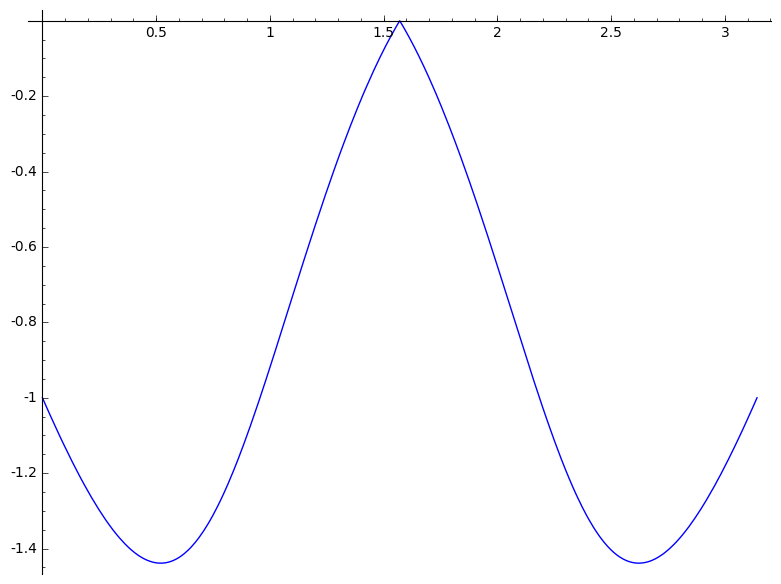

In [205]:
plot(1/5*(sqrt(10*sqrt(5) + 25)*sin(eta)^3 - sqrt(10*sqrt(5) + 25)*sin(eta))/sqrt(sin(eta)^4 - sin(eta)^2 + 1) - abs(cos(eta)) , (eta,0,pi))

In [215]:
theta.simplify_full() == pi/2-pi/10

-arctan(sqrt(sin(eta)^4 - sin(eta)^2 + 1)*abs(cos(eta))/(sin(eta)^3 - sin(eta))) == 2/5*pi